In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import time

In [ ]:
start_time = time.time()
cleartext = []

base_path_python = './'

with open(base_path_python + 'cleartext.txt') as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for element in reader:
        cleartext.append(element)
cleartext = [[int(num) for num in sublist] for sublist in cleartext]

In [ ]:
# https://femionewin.medium.com/aes-encryption-with-python-step-by-step-3e3ab0b0fd6c
# First hamming weight to plot it later
sbox = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16]

model = []
for x in range(150): # For all the cleartexts
    trace = []
    for y in range(256): # For all the keys
        for z in range(16): # For all the positions
            xor = (cleartext[x][z])^y
            HW = bin(sbox[xor]).count('1') # SBOX + count the number of 1s (Hamming weight)
        trace.append(HW)
    model.append(trace)

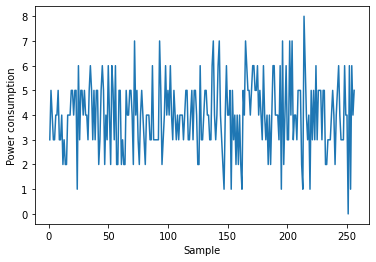

In [ ]:
plt.plot(np.arange(1,257,1), model[0])
plt.xlabel('Sample')
plt.ylabel('Power consumption')
plt.show()

In [ ]:
key = []

for z in range(16): # z is the byte of the key we are analyzing
    trace_byte = []
    print("Analyzing byte "+str(z))

    with open(base_path_python + 'trace'+str(z)+'.txt') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ')
        for element in reader:
            element.pop()
            trace_byte.append(element)
    trace_byte = [[float(num) for num in sublist] for sublist in trace_byte]

    model = []

    for x in range(150): # For all the cleartexts
        trace = []
        for y in range(256): # For all the keys
            xor = (cleartext[x][z])^(y)
            HW = bin(sbox[xor]).count('1') # SBOX + count the number of 1s (Hamming weight)
            trace.append(HW)
        model.append(trace)

    model_transposed = []
    for i in range(256):
            model_i = []
            for j in range(150):
                model_i.append(model[j][i])
            model_transposed.append(model_i)
    
    #CPA
    max = 0
    key_i = 0
    
    for k in range(50000):
        corr_i = []
        trace_i = []
        for j in range(150):
            trace_i.append(trace_byte[j][k])

        for i in range(256):

            corr0 = np.corrcoef(trace_i, model_transposed[i])

            value = abs(corr0[0][1])
            if (value >= 0.7):
                print("       Potential match at t = "+str(k)+" with key = "+str(i)+" and correlation of "+str(value))
                if (value >= max): # We store the value with the highest correlation (i.e. the key)
                    max = value
                    key_i = i
    
    key.append(key_i)

print("The key of dataset1 is ", key)


Analyzing byte 0
       Potential match at t = 29235 with key = 65 and correlation of 0.7298723439186945
       Potential match at t = 29535 with key = 65 and correlation of 0.7222878247145803
       Potential match at t = 32035 with key = 65 and correlation of 0.7578876243519199
       Potential match at t = 32036 with key = 65 and correlation of 0.7063796764046906
       Potential match at t = 32040 with key = 65 and correlation of 0.7150987913216211
       Potential match at t = 32335 with key = 65 and correlation of 0.7916596130387974
       Potential match at t = 32336 with key = 65 and correlation of 0.7248134167240687
       Potential match at t = 32340 with key = 65 and correlation of 0.7292634942009127
       Potential match at t = 40335 with key = 65 and correlation of 0.8159225192371423
       Potential match at t = 40336 with key = 65 and correlation of 0.7263197887031844
       Potential match at t = 40340 with key = 65 and correlation of 0.7776972085587953
       Potentia

       Potential match at t = 46435 with key = 111 and correlation of 0.7851853927928365
       Potential match at t = 47135 with key = 111 and correlation of 0.7339288564180564
Analyzing byte 8
       Potential match at t = 29235 with key = 112 and correlation of 0.7030038576985018
       Potential match at t = 29535 with key = 112 and correlation of 0.7383988296618634
       Potential match at t = 32035 with key = 112 and correlation of 0.7380105228629923
       Potential match at t = 32036 with key = 112 and correlation of 0.781552445591291
       Potential match at t = 32040 with key = 112 and correlation of 0.7247277047581973
       Potential match at t = 32335 with key = 112 and correlation of 0.8019333415853918
       Potential match at t = 32340 with key = 112 and correlation of 0.7100099631833763
       Potential match at t = 40335 with key = 112 and correlation of 0.7766124498256325
       Potential match at t = 40339 with key = 112 and correlation of 0.7266112889029269
     

       Potential match at t = 47135 with key = 115 and correlation of 0.7455163433666563
The key of dataset1 is  [65, 117, 115, 116, 114, 97, 108, 111, 112, 105, 116, 104, 101, 99, 117, 115]


In [ ]:
checksum = sum(key)
print("Checksum:",checksum)
if checksum == 1712:
    print("Checksum is correct")

Checksum: 1712
Checksum is correct


In [ ]:
elapsed_time = time.time() - start_time
print('Execution time:', time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

Execution time: 09:10:26
